# Modélisation des données expérimentales

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit # La fonction qui permet de modéliser

# La librairie scipy permet de modéliser (sous-librairie optimize)
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

La **signature basique** de la fonction `curve_fit` est :

`curve_fit(fonction, x, y)`

avec `fonction` la fonction du modèle qui prend comme paramètres x (une abscisse) et des paramètres de modélisation (\*parametres) et qui retourne y (une ordonnée). Je conseille de définir cette fonction "ailleurs" dans le code".

`curve_fit` retourne un tableau (array) contenant les valeurs optimisées des paramètres et un tableau de la covariance de ces paramètres (inutile à notre niveau !). Seul le premier objet retourné nous est utile.


### Exemple de modélisation avec une fonction affine
On se donne une série de valeurs x et y (à peu près affine) et on cherche à modéliser y = a x + b

a = 0.48499999999887655 ; b = 10.110000000019868


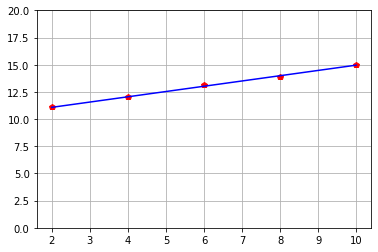

In [3]:
# données à modéliser
y = np.array([11.1, 12.0, 13.1, 13.9, 15.0])
x = np.array([2, 4, 6, 8, 10])

# définition de la fonction modèle
def f_affine(x, a, b):
    """ Modèle d'une fonction affine """
    return a * x + b

# modélisation : recherche des paramètres optimisés du modèle (+ covariance inutile)
parametres, covariance = curve_fit(f_affine, x, y)

a, b = parametres # unpacking des paramètres du modèle
print(f'a = {a} ; b = {b}')

# calcul des ordonnées avec la fonction du modèle et les paramètres optimisés
y_model = f_affine(x, a, b)

# tracé des graphes des données à modéliser et de la fonction modèle optimisée
plt.plot(x, y, 'rp')
plt.plot(x, y_model, 'b')

plt.axis(ymin=0, ymax=20) 
plt.grid(True)

plt.show()

### On recommence de façon un peu plus optimisé

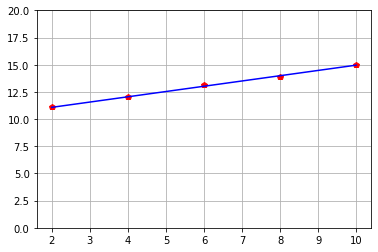

In [4]:
# définition de la fonction modèle
def f(x, a, b):
    return a * x + b

# modélisation : recherche des paramètres optimisés du modèle
parametres = curve_fit(f, x, y)[0] # seuls les paramètres optimisés nous intéressent

# tracé des graphes des données à modéliser et de la fonction modèle optimisée
plt.plot(x, y, 'rp')
plt.plot(x, f(x, *parametres), 'b') # on exploite le unpacking

plt.axis(ymin=0, ymax=20) 
plt.grid(True)

plt.show()

### En raccourciçant au maximum avec une fonction lambda

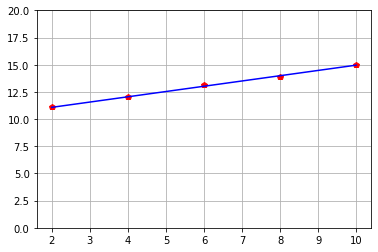

In [5]:
# tracé des graphes des données à modéliser et de la fonction modèle optimisée
plt.plot(x, y, 'rp')
plt.plot(x, f(x, *curve_fit(lambda x,a,b:a*x+b, x, y)[0]), 'b')

plt.axis(ymin=0, ymax=20) 
plt.grid(True)

plt.show()